In [34]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [35]:
app_packages = ['com.ss.android.ugc.trill',
                'omegle.tv']

In [36]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='id', country='id')
    del info['comments']
    app_infos.append(info)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.42it/s]


In [37]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )
    
    print(highlight(json_str,JsonLexer(),TerminalFormatter()))

In [38]:
print_json(app_infos[1])

{
  "adSupported": null,
  "androidVersion": "4.1",
  "androidVersionText": "4.1 dan yang lebih tinggi",
  "appId": "omegle.tv",
  "containsAds": false,
  "contentRating": "Rating 18+",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Mulai bertemu wajah baru dan berteman di OmeTV video chat. Menyambungkan lebih dari 1 juta pengguna seluler dan lebih dari 100.000 pengunjung web chat online!\r\n\r\nFitur:\r\n\r\n\u25cf Obrolan kamera ke kamera yang mudah digunakan: swipe dan chat dengan seseorang\r\n\u25cf Anda tetap dapat menggunakan obrolan teks jika kamera ponsel Anda tidak bekerja atau Anda memiliki kecepatan internet yang rendah \r\n\u25cf Gratis dan mudah digunakan: tanpa biaya keanggotaan, tanpa pendaftaran. Kami menghargai privasi Anda \r\n\u25cf Ratusan ribu pengguna di seluruh dunia: Anda akan selalu menemukan orang yang menarik untuk diajak mengobrol \r\n\u25cf Aman dan terlindungi: sistem mengawasi pelanggaran aturan obrolan secara otomatis, selain 

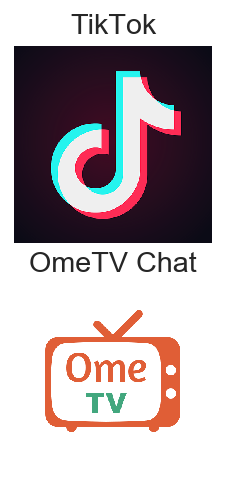

In [39]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(12, 4))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [40]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,TikTok,Cuma TikTok pusatnya video kreatif dan viral! ...,Cuma TikTok pusatnya video kreatif dan viral! ...,Gudangnya Video Lucu Indonesia,Gudangnya Video Lucu Indonesia,100.000.000+,100000000,4.155433,10180729,4211694,...,None,False,7 Mei 2017,1622224208,19.5.43,Dapatkan berbagai efek terbaru dan terbaik.,Dapatkan berbagai efek terbaru dan terbaik.,False,com.ss.android.ugc.trill,https://play.google.com/store/apps/details?id=...
1,"OmeTV Chat Video - Temui orang baru, dan berteman",Mulai bertemu wajah baru dan berteman di OmeTV...,Mulai bertemu wajah baru dan berteman di OmeTV...,Luncurkan chat video dan buka kesenangan tanpa...,Luncurkan chat video dan buka kesenangan tanpa...,50.000.000+,50000000,4.017883,422423,178229,...,None,False,31 Jul 2015,1621327262,605032,Video chat OmeTV has a brand new look!\r\n\r\n...,Video chat OmeTV has a brand new look!<br><br>...,False,omegle.tv,https://play.google.com/store/apps/details?id=...


In [41]:
app_infos_df.to_csv('apps.csv', index = None, header=True)

# Get App Reviews

In [45]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.RATING, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='id',
                country='id',
                sort=sort_order,
                count= 300 if score == 3 else 200,
                filter_score_with=score
              )
            
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'rating' if sort_order == Sort.RATING else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:28<00:00, 14.39s/it]


In [46]:
print_json(app_reviews[1])

{
  "appId": "com.ss.android.ugc.trill",
  "at": "2021-05-28 13:20:53",
  "content": "Aplikasinya sebenarnya bagus..Tp knp skrg sy masuk akun sy hilang, tertulis frekuensi masuk terlalu sering. Apa maksudnya?? Sampai2 sy hapus aplikasi ini trus sy restart hp sy, download kembali tetap seperti itu. Tolong penjelasannya. Sementara sy kasih bintang 1 sebelum semuanya kembali seperti semula.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "19.5.43",
  "reviewId": "gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgatmJAvDFNtYVLljaCMfs3ktQBzYU7roFf_t3-dgPlen1bE",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 4,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJwMgNzuc9QVAMP8yRdeu2bLKwtO3Z5zrDw_EL27=mo",
  "userName": "Dapur Mama Hoshi"
}



In [47]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(6600, 12)

In [48]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGihtvZ-ONGczSX6Bat3d_j4jhSTrVIFoq8FaV...,Mahfi Gaming,https://play-lh.googleusercontent.com/a-/AOh14...,Jelek banget!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,173,19.5.43,2021-05-28 11:02:18,None,NaT,most_relevant,com.ss.android.ugc.trill
1,gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgat...,Dapur Mama Hoshi,https://play-lh.googleusercontent.com/a/AATXAJ...,Aplikasinya sebenarnya bagus..Tp knp skrg sy m...,1,4,19.5.43,2021-05-28 13:20:53,None,NaT,most_relevant,com.ss.android.ugc.trill
2,gp:AOqpTOGIaTrCt7nX7RpQDHD0BDzlVfTJ32H2IjlClF5...,sandal jepit,https://play-lh.googleusercontent.com/a-/AOh14...,maaf kenapa ya 2 hari ini tiktok saya tidak bi...,1,28,19.5.43,2021-05-28 12:49:08,None,NaT,most_relevant,com.ss.android.ugc.trill
3,gp:AOqpTOFTLjgAcC2zQ2D3ZzHVdnqBqjVgpqXo9h-bdYi...,Luluk Muawalah,https://play-lh.googleusercontent.com/a/AATXAJ...,"Tolong kepada pihak tiktok, kenapa tiba2 saya ...",1,5,19.5.43,2021-05-27 23:15:58,None,NaT,most_relevant,com.ss.android.ugc.trill
4,gp:AOqpTOENZzEzt6KOnarNErGzrMJPsakpDaxNKHvAe9m...,Nicho Nicholas,https://play-lh.googleusercontent.com/a/AATXAJ...,"Tolong untuk pihak TikTok, tolong awasi koment...",1,23,19.5.43,2021-05-27 19:32:13,None,NaT,most_relevant,com.ss.android.ugc.trill


In [49]:
# Filter column values
appdf = app_reviews_df[app_reviews_df.sortOrder.isin(["most_relevant"])]
appdf.head()
appdf.shape

(2200, 12)